In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/

Cloning into 'yolov5'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 4933 (delta 4), reused 6 (delta 1), pack-reused 4914
Receiving objects: 100% (4933/4933), 7.62 MiB | 32.11 MiB/s, done.
Resolving deltas: 100% (3362/3362), done.
     |████████████████████████████████| 2.0MB 17.9MB/s 
     |████████████████████████████████| 11.5MB 57.5MB/s 
Requirement already up-to-date: numpy>=1.18.5 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 6)) (1.19.5)
     |████████████████████████████████| 50.4MB 52kB/s 
     |████████████████████████████████| 2.2MB 45.8MB/s 
     |████████████████████████████████| 645kB 58.8MB/s 
     |████████████████████████████████| 25.9MB 114kB/s 
Requirement already up-to-date: tensorboard>=2.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 11)) (2.4.1)
     |████████████████████████████████| 776.8M

/content


In [ ]:
!unzip ./drive/MyDrive/bcc.zip

Archive:  ./drive/MyDrive/bcc.zip
   creating: bcc/
   creating: bcc/images/
   creating: bcc/images/train/
  inflating: bcc/images/train/00048035_FILE0.bmp  
  inflating: bcc/images/train/00048035_FILE1.bmp  
  inflating: bcc/images/train/00048035_FILE3.bmp  
  inflating: bcc/images/train/00048035_FILE4.bmp  
  inflating: bcc/images/train/01142281_FILE0.bmp  
  inflating: bcc/images/train/01142281_FILE1.bmp  
  inflating: bcc/images/train/01142281_FILE2.bmp  
  inflating: bcc/images/train/01142281_FILE3.bmp  
  inflating: bcc/images/train/01142281_FILE4.bmp  
  inflating: bcc/images/train/01142281_FILE5.bmp  
  inflating: bcc/images/train/016047953_FILE0.bmp  
  inflating: bcc/images/train/016047953_FILE1.bmp  
  inflating: bcc/images/train/016047953_FILE2.bmp  
  inflating: bcc/images/train/016047953_FILE3.bmp  
  inflating: bcc/images/train/01990231_FILE0.bmp  
  inflating: bcc/images/train/01990231_FILE2.bmp  
  inflating: bcc/images/train/01990231_FILE3.bmp  
  inflating: bcc/imag

In [ ]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.7.1 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
import os

%cd ./yolov5/

/content/yolov5


In [ ]:
# bcc.yaml

Lines = [
  "train: ../bcc/images/train\n",
  "val: ../bcc/images/valid\n",
  "nc: 2\n",
  "names: ['S', 'normal']",
]

with open('./bcc.yaml', mode='w') as f:
  for Line in Lines:
    f.write(Line)

In [ ]:
!python3 ./train.py --img 400 --batch 80 --epochs 2000 --data ./bcc.yaml --cfg ./models/yolov5m.yaml --device '0'

串流輸出內容已截斷至最後 5000 行。
     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 1001/1999     11.9G   0.03266   0.04237 0.0004086   0.07544      1511       416: 100% 2/2 [00:05<00:00,  2.65s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 1/1 [00:00<00:00,  1.86it/s]
                 all          17         173       0.975       0.965       0.989       0.737

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 1002/1999     11.9G   0.03253   0.04125  0.000367   0.07415      1379       416: 100% 2/2 [00:04<00:00,  2.25s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 1/1 [00:00<00:00,  2.95it/s]
                 all          17         173       0.978       0.975       0.989       0.716

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 1003/1999     11.9G   0.03095   0.04053 0.0004018   0.07189

In [ ]:
!python3 ./detect.py --weights ./runs/train/exp/weights/best.pt --img 400 --conf 0.1 --source ../bcc/images/valid/ --save-conf --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, img_size=400, iou_thres=0.45, name='exp', project='runs/detect', save_conf=True, save_txt=True, source='../bcc/images/valid/', update=False, view_img=False, weights=['./runs/train/exp/weights/best.pt'])
YOLOv5 v4.0-95-gcc79f3a torch 1.7.1 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21041679 parameters, 0 gradients, 50.3 GFLOPS
image 1/17 /content/yolov5/../bcc/images/valid/01990231_FILE1.bmp: 416x192 17 normals, Done. (0.015s)
image 2/17 /content/yolov5/../bcc/images/valid/01990231_FILE10.bmp: 416x192 1 S, 8 normals, Done. (0.013s)
image 3/17 /content/yolov5/../bcc/images/valid/03158534_FILE4.bmp: 416x192 1 S, 15 normals, Done. (0.017s)
image 4/17 /content/yolov5/../bcc/images/valid/03158534_FILE5.bmp: 416x192 1 S, 10 normals, Done. (0.013s)
image 5/17 /content/yolov5/../bcc/images/valid/04886479_FILE0.bmp: 416x224 1 S, 11 normals, Done. (0.014s)
image 6

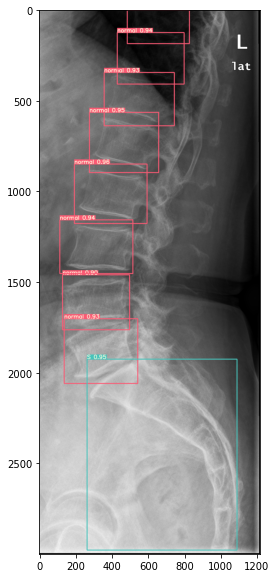

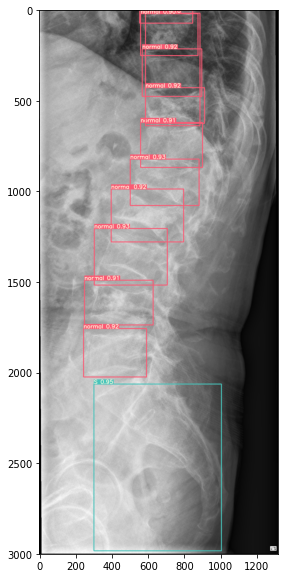

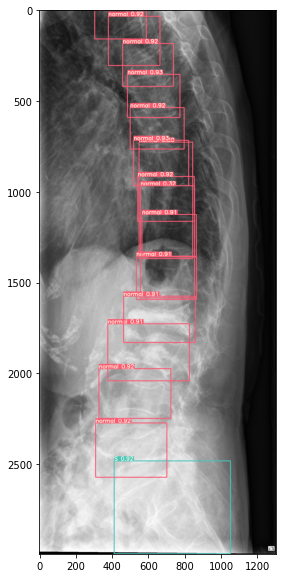

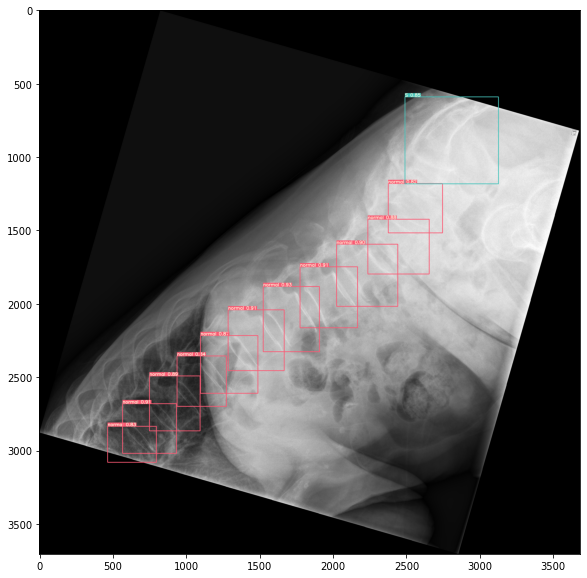

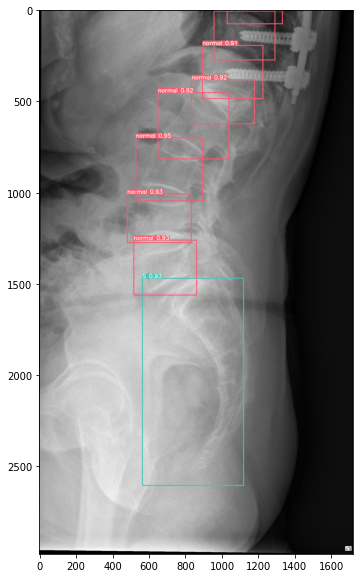

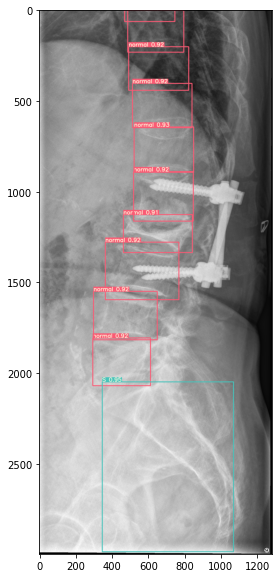

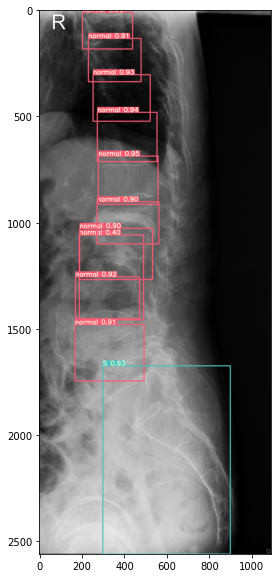

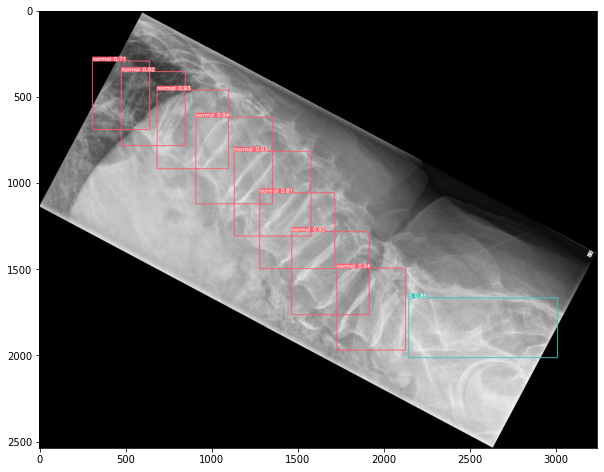

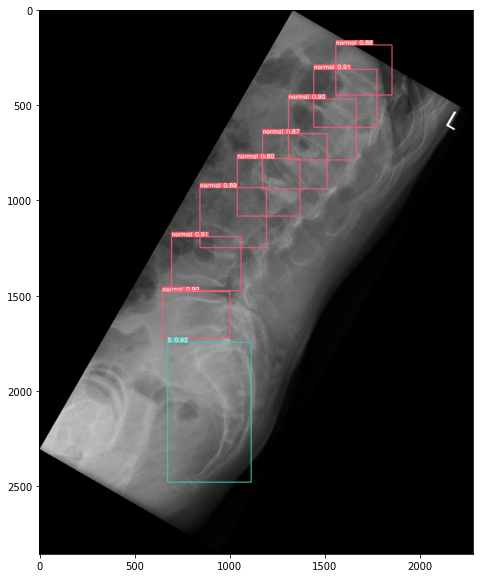

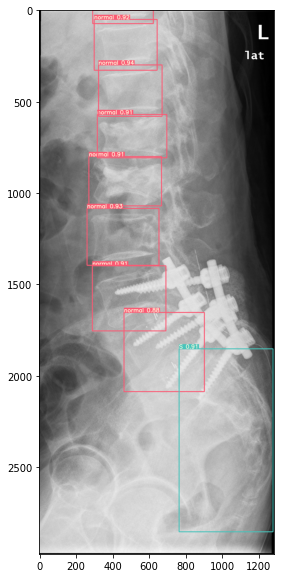

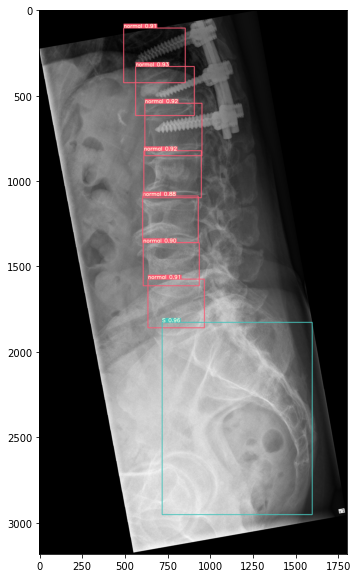

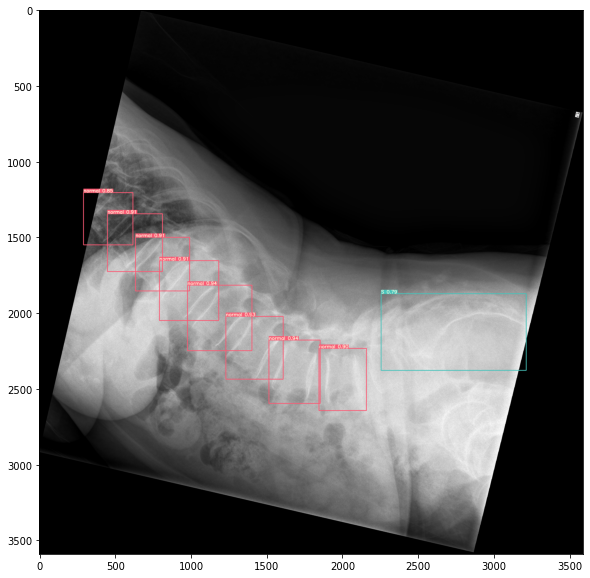

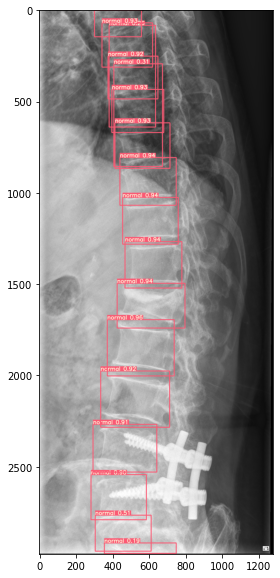

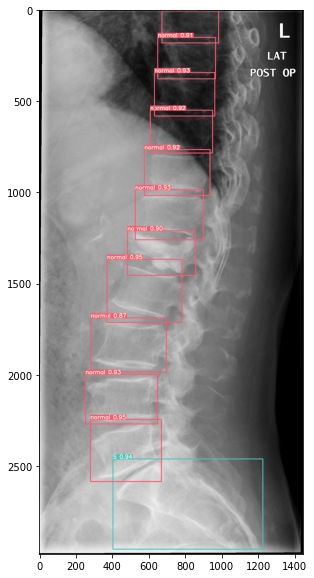

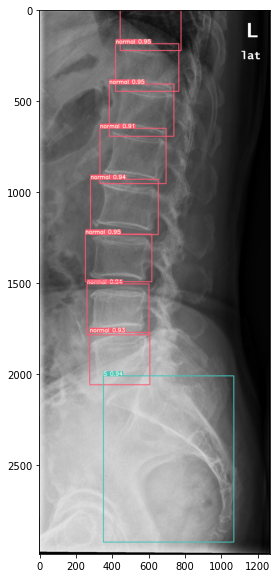

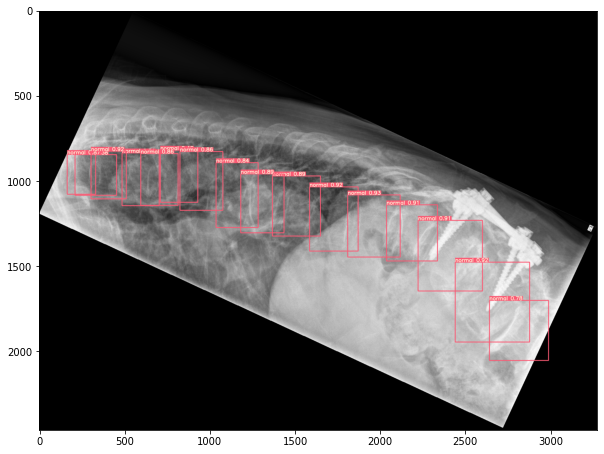

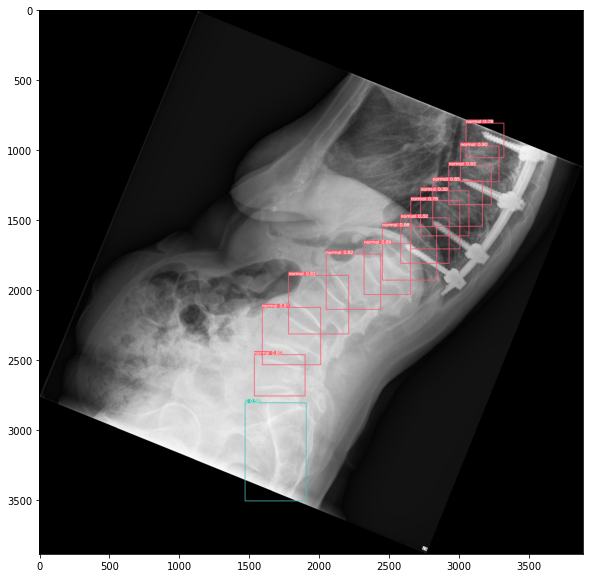

In [ ]:
import glob
import matplotlib.pyplot as plt
import PIL


for idx, imageName in enumerate(glob.glob('/content/yolov5/runs/detect/exp/*.bmp')):
  
  # if idx == 20:
  #   break
  
  f = PIL.Image.open(imageName)
  plt.figure(figsize=(10,10))
  plt.imshow(f)

In [ ]:
!zip -r ../result.zip /content/yolov5/runs/detect/exp/labels

  adding: content/yolov5/runs/detect/exp/labels/ (stored 0%)
  adding: content/yolov5/runs/detect/exp/labels/05609172_FILE6.txt (deflated 55%)
  adding: content/yolov5/runs/detect/exp/labels/06280116_FILE1.txt (deflated 54%)
  adding: content/yolov5/runs/detect/exp/labels/Transform_FILE46.txt (deflated 54%)
  adding: content/yolov5/runs/detect/exp/labels/Transform_FILE24.txt (deflated 56%)
  adding: content/yolov5/runs/detect/exp/labels/04886479_FILE6.txt (deflated 56%)
  adding: content/yolov5/runs/detect/exp/labels/03158534_FILE5.txt (deflated 56%)
  adding: content/yolov5/runs/detect/exp/labels/01990231_FILE1.txt (deflated 58%)
  adding: content/yolov5/runs/detect/exp/labels/Transform_FILE1.txt (deflated 55%)
  adding: content/yolov5/runs/detect/exp/labels/10929576_FILE4.txt (deflated 54%)
  adding: content/yolov5/runs/detect/exp/labels/04886479_FILE0.txt (deflated 56%)
  adding: content/yolov5/runs/detect/exp/labels/Transform_FILE19.txt (deflated 57%)
  adding: content/yolov5/runs/

In [ ]:
!zip -r ../runs_result.zip ./runs/train/exp/

  adding: runs/train/exp/ (stored 0%)
  adding: runs/train/exp/test_batch0_pred.jpg (deflated 13%)
  adding: runs/train/exp/test_batch0_labels.jpg (deflated 16%)
  adding: runs/train/exp/weights/ (stored 0%)
  adding: runs/train/exp/weights/last.pt (deflated 10%)
  adding: runs/train/exp/weights/best.pt (deflated 10%)
  adding: runs/train/exp/train_batch0.jpg (deflated 6%)
  adding: runs/train/exp/F1_curve.png (deflated 16%)
  adding: runs/train/exp/R_curve.png (deflated 19%)
  adding: runs/train/exp/labels.jpg (deflated 21%)
  adding: runs/train/exp/events.out.tfevents.1614083456.8a65df9d3012.250.0 (deflated 70%)
  adding: runs/train/exp/opt.yaml (deflated 48%)
  adding: runs/train/exp/labels_correlogram.jpg (deflated 26%)
  adding: runs/train/exp/confusion_matrix.png (deflated 37%)
  adding: runs/train/exp/P_curve.png (deflated 19%)
  adding: runs/train/exp/results.png (deflated 10%)
  adding: runs/train/exp/train_batch2.jpg (deflated 6%)
  adding: runs/train/exp/train_batch1.jpg (de

In [ ]:
!zip -r ../runs_result_img.zip /content/yolov5/runs/detect/exp

  adding: content/yolov5/runs/detect/exp/ (stored 0%)
  adding: content/yolov5/runs/detect/exp/04886479_FILE6.bmp (deflated 73%)
  adding: content/yolov5/runs/detect/exp/13549073_FILE6.bmp (deflated 72%)
  adding: content/yolov5/runs/detect/exp/03158534_FILE4.bmp (deflated 72%)
  adding: content/yolov5/runs/detect/exp/Transform_FILE24.bmp (deflated 84%)
  adding: content/yolov5/runs/detect/exp/06280116_FILE1.bmp (deflated 74%)
  adding: content/yolov5/runs/detect/exp/05609172_FILE6.bmp (deflated 70%)
  adding: content/yolov5/runs/detect/exp/03158534_FILE5.bmp (deflated 74%)
  adding: content/yolov5/runs/detect/exp/Transform_FILE1.bmp (deflated 84%)
  adding: content/yolov5/runs/detect/exp/Transform_FILE46.bmp (deflated 87%)
  adding: content/yolov5/runs/detect/exp/10929576_FILE4.bmp (deflated 72%)
  adding: content/yolov5/runs/detect/exp/Transform_FILE38.bmp (deflated 80%)
  adding: content/yolov5/runs/detect/exp/Transform_FILE15.bmp (deflated 84%)
  adding: content/yolov5/runs/detect/